In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Load a dataset from a CSV file
tortilla_prices_path = (r'C:\Users\vanes\Tortillas-Project\tortilla_prices.csv')

In [2]:
tortilla_df = pd.read_csv(tortilla_prices_path)

In [3]:
# Check for missing values
print(tortilla_df.isnull().sum())

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


In [4]:
tortilla_df.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [5]:
# Drop missing values
tortilla_df = tortilla_df.dropna(how='any')

In [6]:
tortilla_df.count()

State                 278004
City                  278004
Year                  278004
Month                 278004
Day                   278004
Store type            278004
Price per kilogram    278004
dtype: int64

In [7]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278004 non-null  object 
 1   City                278004 non-null  object 
 2   Year                278004 non-null  int64  
 3   Month               278004 non-null  int64  
 4   Day                 278004 non-null  int64  
 5   Store type          278004 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [8]:
tortilla_df=tortilla_df[~tortilla_df["Year"].isna()]

In [9]:
tortilla_df[["Year","Month","Day"]]=tortilla_df[["Year","Month","Day"]].astype(int)

In [12]:
# Create a new 'date' column with the concatenated date 

tortilla_df['Date'] = tortilla_df['Month'].astype(str).str.zfill(2) + '/' + tortilla_df['Day'].astype(str).str.zfill(2) + '/' + tortilla_df['Year'].astype(str)

In [13]:
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,01/10/2007
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0,01/10/2007
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0,01/10/2007
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0,01/10/2007
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0,01/10/2007


In [14]:
tortilla_df["Date"]=pd.to_datetime(tortilla_df["Date"])

In [15]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               278004 non-null  object        
 1   City                278004 non-null  object        
 2   Year                278004 non-null  int32         
 3   Month               278004 non-null  int32         
 4   Day                 278004 non-null  int32         
 5   Store type          278004 non-null  object        
 6   Price per kilogram  278004 non-null  float64       
 7   Date                278004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 15.9+ MB


## How does the price increase overtime?
Yearly average price trend from 2007-2023


In [16]:
yearly_avg = tortilla_df.groupby('Year')['Price per kilogram'].mean().reset_index()

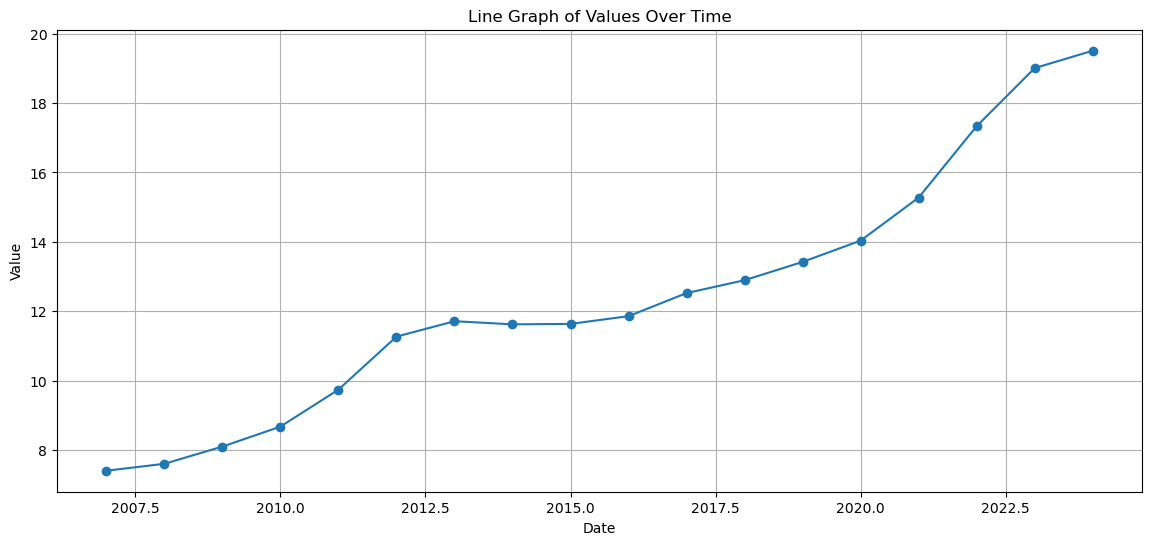

In [17]:
# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Price per kilogram'], marker='o')

# Add titles and labels
plt.title('Line Graph of Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()

In [18]:
df_cleaned = tortilla_df[(tortilla_df != 0).all(axis=1)]

In [19]:
df_cleaned.describe()

,Year,Month,Day,Price per kilogram,Date
count,278003.000000,278003.000000,278003.000000,278003.000000,278003
mean,2015.196171,6.349133,15.918839,12.203111,2015-09-06 18:34:15.163433472
min,2007.000000,1.000000,1.000000,3.870000,2007-01-10 00:00:00
25%,2011.000000,3.000000,8.000000,9.600000,2011-06-08 00:00:00
50%,2015.000000,6.000000,16.000000,11.230000,2015-08-05 00:00:00
75%,2019.000000,9.000000,24.000000,14.090000,2019-11-27 00:00:00
max,2024.000000,12.000000,31.000000,31.000000,2024-07-08 00:00:00
std,5.027867,3.431043,8.751719,4.490438,NaN


## Comparing Stores by States in Mexico Based Off The Average Yearly Price


In [20]:
yearly_avg = tortilla_df.groupby('Year')['Price per kilogram'].mean().reset_index()

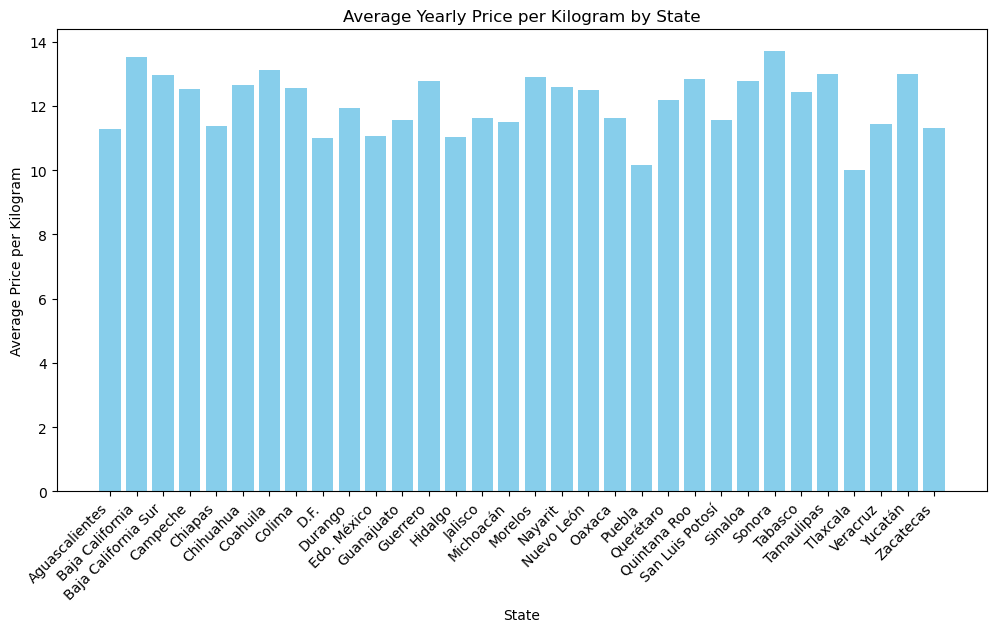

In [23]:
df = pd.read_csv(r'C:\Users\vanes\Tortillas-Project\tortilla_prices.csv')
average_prices = df.groupby('State')['Price per kilogram'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_prices['State'], average_prices['Price per kilogram'], color='skyblue')
plt.title('Average Yearly Price per Kilogram by State')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.show()

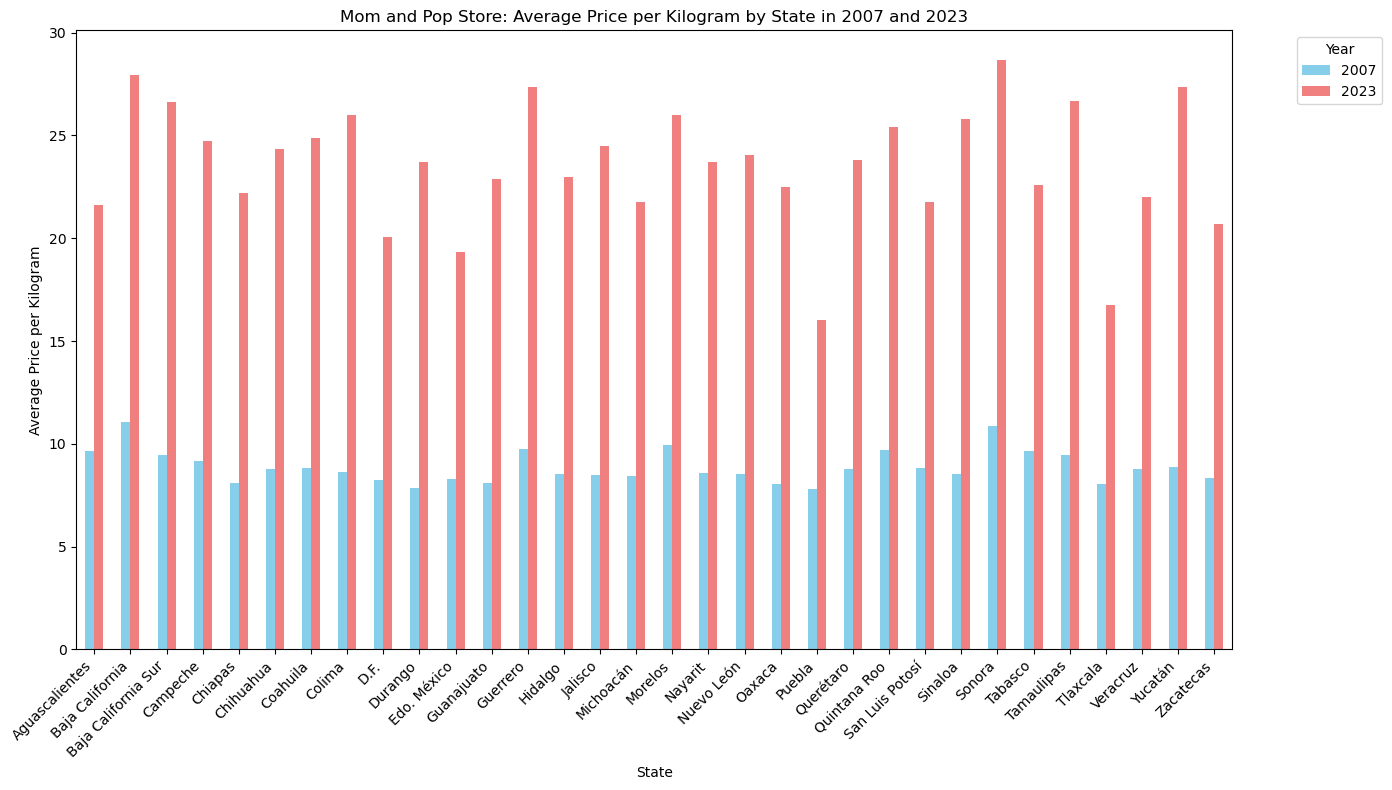

In [24]:
df = pd.read_csv(r'C:\Users\vanes\Tortillas-Project\tortilla_prices.csv')

selected_years = [2007, 2023]
selected_stores = ['Mom and Pop Store']

filtered_df = df[df['Year'].isin(selected_years) & df['Store type'].isin(selected_stores)]
selected_columns_df = filtered_df[['State', 'Price per kilogram', 'Store type']]

average_prices = filtered_df.groupby(['State', 'Year'])['Price per kilogram'].mean().unstack()
average_prices.plot(kind='bar', figsize=(14, 8), color = ['skyblue', 'lightcoral'])

plt.title('Mom and Pop Store: Average Price per Kilogram by State in 2007 and 2023')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

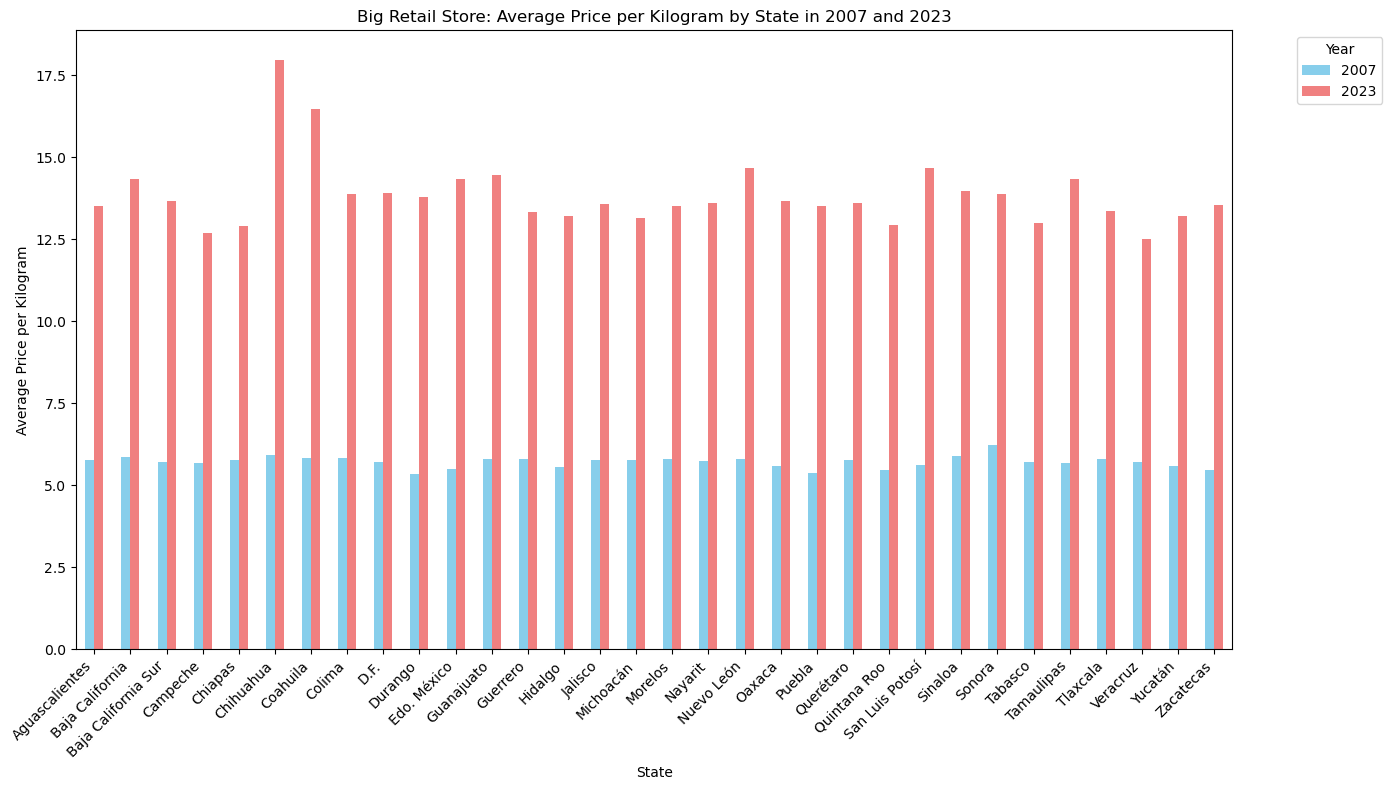

In [25]:
df = pd.read_csv(r'C:\Users\vanes\Tortillas-Project\tortilla_prices.csv')

selected_years = [2007, 2023]
selected_stores = ['Big Retail Store']

filtered_df = df[df['Year'].isin(selected_years) & df['Store type'].isin(selected_stores)]
selected_columns_df = filtered_df[['State', 'Price per kilogram', 'Store type']]

average_prices = filtered_df.groupby(['State', 'Year'])['Price per kilogram'].mean().unstack()
average_prices.plot(kind='bar', figsize=(14, 8), color = ['skyblue', 'lightcoral'])

plt.title('Big Retail Store: Average Price per Kilogram by State in 2007 and 2023')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()